#### Data dictionary

* Gender is the sex of the individual.

* The length of time the individual has spent on earth. Measured in years.

* Polyuria is a condition where the body urinates more than usual and passes excessive or abnormally large amounts of urine each time you urinate.

* Polydipsia is the medical definition of excessive thirst.

* Sudden weight loss is a condition where the body of the individual reduces suddenly.

* Weakness is a state where the body of the individual is generally weak.

* Polyphagia (hyperphagia) is a feeling of extreme, insatiable hunger.

* Genital thrush is an infection of the private part.

* Blurred vision is a condition in which the sight of the individual is not clear.

* Itching is when a part of the body or parts of the body itches.

* Irritability can be normal, and is only an indicator of underlying disease when feelings become excessive, all-consuming and interfere with daily living.

* Delayed healing is when it takes longer time for the body to heal from a disease.

* Paresis involves the weakening of a muscle or group of muscles. It may also be referred to as partial or mild paralysis.

* Muscle stiffness is the sensation of pain or tightness in your muscles.

* Alopecia areata is a disease that causes hair loss. Most people lose hair on their scalp or beard area, but hair loss can occur anywhere on your body.

* Obesity is a long-term (chronic) health condition that progresses over time. Obesity is defined by excess body fat (adipose tissue) that may impair health.

* Class is the diabetic condition of the person. It is either positive or negative.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import confusion_matrix,f1_score,recall_score,roc_curve,precision_score
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import 



In [2]:
#my_path = 'C:/Users/OLU-JUNAID & CO/Downloads'
#df = pd.read_csv(os.path.join(my_path,'diabetes.csv'))
df = pd.read_csv('Diabetes.csv')
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [3]:
df.replace({'Positive':1,
           'Negative':0},
          inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [5]:
df.Age.describe()

count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: Age, dtype: float64

#### The least age in consideration here is 16 and oldest person is 90 years old.

#### Exploratory Data Analysis

C:\Users\OLU-JUNAID & CO\AppData\Local\Temp\ipykernel_7312\1239919984.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

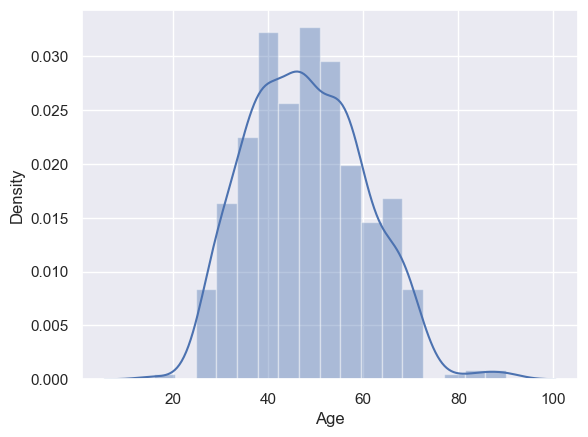

In [6]:
sns.distplot(df.Age)

In [7]:
df.Age[df.Age<20]

133    16
Name: Age, dtype: int64

In [8]:
df.Age[df.Age>80]

101    85
102    90
185    85
186    90
Name: Age, dtype: int64

In [9]:
df = df[df.Age<80]

In [10]:
df = df[df.Age>20]

C:\Users\OLU-JUNAID & CO\AppData\Local\Temp\ipykernel_7312\1239919984.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

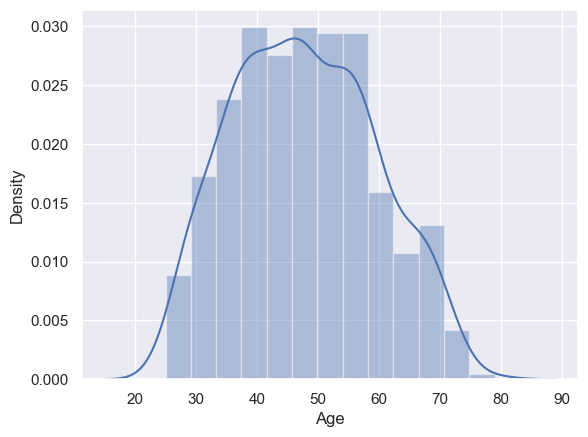

In [11]:
sns.distplot(df.Age)

In [12]:
df['class'].value_counts()

class
1    315
0    200
Name: count, dtype: int64

<Axes: xlabel='class'>

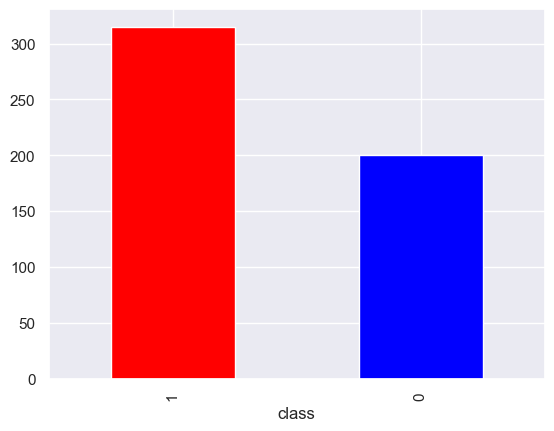

In [13]:
df['class'].value_counts().plot.bar(color = ['red','blue'])

In [14]:
df.Gender.value_counts()

Gender
Male      325
Female    190
Name: count, dtype: int64

<Axes: xlabel='Gender'>

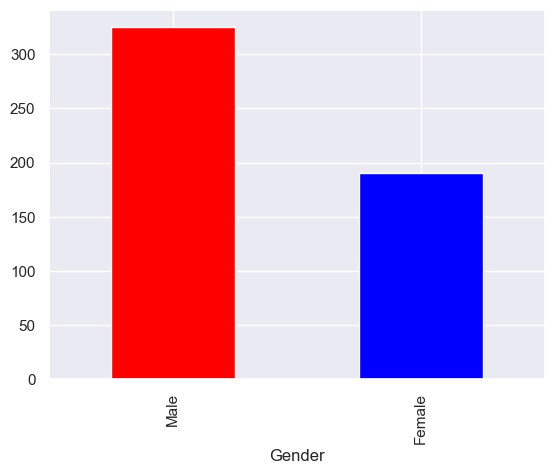

In [15]:
df.Gender.value_counts().plot.bar(color = ['red','blue'])

#### There are more male patients in the dataset than there are female patients.

In [16]:
pd.crosstab(df.Gender,df['class'])

class,0,1
Gender,,
Female,19,171
Male,181,144


#### According to this dataset, a female is more likely to have a Positive diabetes condition state.

In [17]:
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Gender
Polyuria
Polydipsia
sudden weight loss
weakness
Polyphagia
Genital thrush
visual blurring
Itching
Irritability
delayed healing
partial paresis
muscle stiffness
Alopecia
Obesity


In [18]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,1
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,1
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,1
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,1
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1


In [19]:
df.Polyuria.value_counts()

Polyuria
No     260
Yes    255
Name: count, dtype: int64

<Axes: xlabel='Polyuria'>

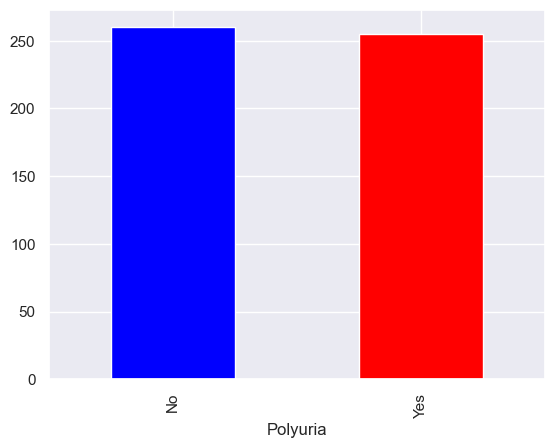

In [20]:
df.Polyuria.value_counts().plot.bar(color = ['blue','red'])




##### There are less patients suffering from Polyuria

In [21]:
pd.crosstab(df.Polyuria,df['class'])

class,0,1
Polyuria,,
No,185,75
Yes,15,240


* From the table above, a patient suffering from Polyuria is more likely to have the disease.

In [22]:
pd.crosstab(df.Gender,df.Polyuria)

Polyuria,No,Yes
Gender,,
Female,61,129
Male,199,126


* Females have Polyuria the most.

In [23]:
df.Obesity.value_counts()

Obesity
No     427
Yes     88
Name: count, dtype: int64

In [24]:
pd.crosstab(df.Gender,df.Obesity)

Obesity,No,Yes
Gender,,
Female,157,33
Male,270,55


#### Label Encoding

In [25]:
df1 = df.copy()

In [26]:
df1

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,1
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,1
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,1
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,1
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,1
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,1
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,1
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,0


In [27]:
cat_columns = []
for c in df1.columns:
    if df1[c].dtype == 'object':
        cat_columns.append(c)

In [28]:
cat_columns

['Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity']

In [29]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
ohe = OneHotEncoder(drop = 'first')
#ohe.get_feature_names_out
ohe_transform = ohe.fit_transform(df1[cat_columns])
ohe_transform
#the encoded data is stored in a matrix
dense_df = ohe_transform.todense() #the matrix is turned dense
df_todense = pd.DataFrame(dense_df, columns = ohe.get_feature_names_out()) #the densed data is turned into a dataframe

df1 = pd.concat([df1,df_todense],
               axis = 1)
df1.drop(cat_columns,axis = 1,inplace =True)
df1

#df1 = pd.concat([df1,ohe_transform],
               #axis = 1)

#df1.drop(cat_columns,axis = 1, inplace = True)
#df1.head()

,Age,class,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
0,40.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,58.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,41.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,45.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,60.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,NaN,NaN,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
102,NaN,NaN,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
133,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
185,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0


In [30]:
import pickle
pickle.dump(ohe,open('encoder.pkl','wb'))

In [31]:
#for label,content in df1.items():
    #if pd.api.types.is_string_dtype(content):
        #df1[label] = content.astype("category").cat.as_ordered()

In [32]:
#for label,content in df1.items():
    #if pd.api.types.is_categorical_dtype(content):
        #df1[label] = pd.Categorical(content).codes

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 520 entries, 0 to 186
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     515 non-null    float64
 1   class                   515 non-null    float64
 2   Gender_Male             515 non-null    float64
 3   Polyuria_Yes            515 non-null    float64
 4   Polydipsia_Yes          515 non-null    float64
 5   sudden weight loss_Yes  515 non-null    float64
 6   weakness_Yes            515 non-null    float64
 7   Polyphagia_Yes          515 non-null    float64
 8   Genital thrush_Yes      515 non-null    float64
 9   visual blurring_Yes     515 non-null    float64
 10  Itching_Yes             515 non-null    float64
 11  Irritability_Yes        515 non-null    float64
 12  delayed healing_Yes     515 non-null    float64
 13  partial paresis_Yes     515 non-null    float64
 14  muscle stiffness_Yes    515 non-null    float64

In [34]:
df1.dropna(inplace = True)

In [35]:
df1.corr()

,Age,class,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
Age,1.000000,0.093857,0.064735,-0.014017,0.005113,-0.016511,-0.039109,-0.018386,0.037915,-0.013562,-0.024789,0.060237,-0.045883,-0.019552,-0.164689,-0.075375,0.076247
class,0.093857,1.000000,-0.197761,0.368850,0.365354,0.181136,0.101948,0.191415,0.104726,0.219631,-0.033055,0.204583,-0.014244,0.195267,0.133338,-0.194057,-0.038810
Gender_Male,0.064735,-0.197761,1.000000,-0.284861,-0.313616,-0.289754,-0.133785,-0.235791,0.216734,-0.207531,-0.048531,-0.020633,-0.109439,-0.347485,-0.092141,0.337939,-0.010407
Polyuria_Yes,-0.014017,0.368850,-0.284861,1.000000,0.614229,0.452389,0.261093,0.369184,0.091987,0.243334,0.101649,0.240405,0.140697,0.442012,0.155317,-0.136534,0.141466
Polydipsia_Yes,0.005113,0.365354,-0.313616,0.614229,1.000000,0.408941,0.340472,0.326413,0.019561,0.317258,0.118901,0.223677,0.121910,0.450531,0.182550,-0.316688,0.102440
sudden weight loss_Yes,-0.016511,0.181136,-0.289754,0.452389,0.408941,1.000000,0.284015,0.234961,0.076789,0.063975,-0.009746,0.145334,0.085554,0.259785,0.098815,-0.218077,0.178433
weakness_Yes,-0.039109,0.101948,-0.133785,0.261093,0.340472,0.284015,1.000000,0.169020,0.031909,0.308406,0.316540,0.145722,0.325825,0.258982,0.267668,0.094547,0.046944
Polyphagia_Yes,-0.018386,0.191415,-0.235791,0.369184,0.326413,0.234961,0.169020,1.000000,-0.065350,0.302635,0.150731,0.242056,0.257295,0.364514,0.325351,-0.052906,0.032056
Genital thrush_Yes,0.037915,0.104726,0.216734,0.091987,0.019561,0.076789,0.031909,-0.065350,1.000000,-0.162699,0.111853,0.161258,0.136898,-0.204519,-0.133889,0.198230,0.056672
visual blurring_Yes,-0.013562,0.219631,-0.207531,0.243334,0.317258,0.063975,0.308406,0.302635,-0.162699,1.000000,0.284690,0.094559,0.185232,0.370824,0.419718,0.016651,0.112977


In [36]:
x = df1.drop('class',axis = 1)
y = df1['class']



In [37]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer
scaler = MinMaxScaler()
x_scaled = scaler.fit(x)
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns = x.columns)
x_scaled.head()

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
0,0.277778,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,0.611111,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.296296,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.370370,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.648148,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [38]:
pickle.dump(scaler,open('scal.pkl','wb'))

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.1,random_state=0)

In [40]:
models = {"Logistic Regression": LogisticRegression(),
         "Random Forest": RandomForestClassifier(),
         'AdaBoost':AdaBoostClassifier(),
         'BaggingClassifier':BaggingClassifier(),
         'GradientBoost':GradientBoostingClassifier(),
         #'Catboost':CatBoostClassifier(),
         'XGBoost':XGBClassifier()
         }


In [41]:
import model_trainer

In [42]:
from model_trainer import fit_and_score

In [43]:
fit_and_score(x_train,x_test,y_train,y_test)

C:\Users\Public\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Learning rate set to 0.007388
0:	learn: 0.6892809	total: 152ms	remaining: 2m 31s
1:	learn: 0.6869982	total: 161ms	remaining: 1m 20s
2:	learn: 0.6839085	total: 172ms	remaining: 57s
3:	learn: 0.6806226	total: 179ms	remaining: 44.5s
4:	learn: 0.6768103	total: 185ms	remaining: 36.8s
5:	learn: 0.6733921	total: 191ms	remaining: 31.7s
6:	learn: 0.6700426	total: 198ms	remaining: 28.2s
7:	learn: 0.6667361	total: 204ms	remaining: 25.3s
8:	learn: 0.6632941	total: 208ms	remaining: 22.9s
9:	learn: 0.6594114	total: 212ms	remaining: 21s
10:	learn: 0.6565528	total: 216ms	remaining: 19.4s
11:	learn: 0.6531676	total: 220ms	remaining: 18.1s
12:	learn: 0.6509711	total: 223ms	remaining: 16.9s
13:	learn: 0.6480663	total: 227ms	remaining: 16s
14:	learn: 0.6447734	total: 232ms	remaining: 15.2s
15:	learn: 0.6431335	total: 235ms	remaining: 14.4s
16:	learn: 0.6396985	total: 239ms	remaining: 13.8s
17:	learn: 0.6366059	total: 243ms	remaining: 13.2s
18:	learn: 0.6345226	total: 246ms	remaining: 12.7s
19:	learn: 0.63

165:	learn: 0.3812241	total: 789ms	remaining: 3.96s
166:	learn: 0.3803239	total: 793ms	remaining: 3.96s
167:	learn: 0.3794029	total: 796ms	remaining: 3.94s
168:	learn: 0.3786299	total: 800ms	remaining: 3.94s
169:	learn: 0.3778908	total: 804ms	remaining: 3.93s
170:	learn: 0.3768593	total: 808ms	remaining: 3.92s
171:	learn: 0.3761282	total: 811ms	remaining: 3.91s
172:	learn: 0.3754923	total: 816ms	remaining: 3.9s
173:	learn: 0.3746368	total: 820ms	remaining: 3.89s
174:	learn: 0.3741789	total: 823ms	remaining: 3.88s
175:	learn: 0.3733574	total: 827ms	remaining: 3.87s
176:	learn: 0.3722362	total: 831ms	remaining: 3.86s
177:	learn: 0.3713058	total: 835ms	remaining: 3.85s
178:	learn: 0.3705944	total: 838ms	remaining: 3.84s
179:	learn: 0.3698611	total: 841ms	remaining: 3.83s
180:	learn: 0.3687495	total: 846ms	remaining: 3.83s
181:	learn: 0.3679110	total: 850ms	remaining: 3.82s
182:	learn: 0.3670063	total: 853ms	remaining: 3.81s
183:	learn: 0.3663102	total: 857ms	remaining: 3.8s
184:	learn: 0.

325:	learn: 0.2841250	total: 1.37s	remaining: 2.84s
326:	learn: 0.2838032	total: 1.38s	remaining: 2.84s
327:	learn: 0.2833485	total: 1.38s	remaining: 2.83s
328:	learn: 0.2829634	total: 1.39s	remaining: 2.83s
329:	learn: 0.2826188	total: 1.39s	remaining: 2.82s
330:	learn: 0.2820401	total: 1.39s	remaining: 2.82s
331:	learn: 0.2815108	total: 1.4s	remaining: 2.82s
332:	learn: 0.2811409	total: 1.4s	remaining: 2.81s
333:	learn: 0.2807339	total: 1.41s	remaining: 2.81s
334:	learn: 0.2805020	total: 1.41s	remaining: 2.8s
335:	learn: 0.2797764	total: 1.42s	remaining: 2.8s
336:	learn: 0.2794136	total: 1.42s	remaining: 2.79s
337:	learn: 0.2787884	total: 1.42s	remaining: 2.79s
338:	learn: 0.2782925	total: 1.43s	remaining: 2.78s
339:	learn: 0.2780893	total: 1.43s	remaining: 2.77s
340:	learn: 0.2777397	total: 1.43s	remaining: 2.77s
341:	learn: 0.2772748	total: 1.44s	remaining: 2.76s
342:	learn: 0.2768057	total: 1.44s	remaining: 2.76s
343:	learn: 0.2763998	total: 1.44s	remaining: 2.75s
344:	learn: 0.27

486:	learn: 0.2292867	total: 1.95s	remaining: 2.06s
487:	learn: 0.2289979	total: 1.96s	remaining: 2.05s
488:	learn: 0.2287407	total: 1.96s	remaining: 2.05s
489:	learn: 0.2284618	total: 1.97s	remaining: 2.05s
490:	learn: 0.2282466	total: 1.97s	remaining: 2.04s
491:	learn: 0.2278888	total: 2s	remaining: 2.06s
492:	learn: 0.2275627	total: 2s	remaining: 2.06s
493:	learn: 0.2274917	total: 2.01s	remaining: 2.06s
494:	learn: 0.2272358	total: 2.01s	remaining: 2.05s
495:	learn: 0.2270004	total: 2.02s	remaining: 2.05s
496:	learn: 0.2269330	total: 2.02s	remaining: 2.04s
497:	learn: 0.2266015	total: 2.02s	remaining: 2.04s
498:	learn: 0.2263525	total: 2.02s	remaining: 2.03s
499:	learn: 0.2260186	total: 2.03s	remaining: 2.03s
500:	learn: 0.2258213	total: 2.03s	remaining: 2.02s
501:	learn: 0.2255616	total: 2.04s	remaining: 2.02s
502:	learn: 0.2252098	total: 2.04s	remaining: 2.02s
503:	learn: 0.2249449	total: 2.04s	remaining: 2.01s
504:	learn: 0.2246719	total: 2.05s	remaining: 2.01s
505:	learn: 0.2243

674:	learn: 0.1879314	total: 2.69s	remaining: 1.29s
675:	learn: 0.1877646	total: 2.69s	remaining: 1.29s
676:	learn: 0.1876105	total: 2.7s	remaining: 1.29s
677:	learn: 0.1874735	total: 2.7s	remaining: 1.28s
678:	learn: 0.1873207	total: 2.71s	remaining: 1.28s
679:	learn: 0.1871653	total: 2.71s	remaining: 1.27s
680:	learn: 0.1868606	total: 2.72s	remaining: 1.27s
681:	learn: 0.1867157	total: 2.72s	remaining: 1.27s
682:	learn: 0.1865616	total: 2.72s	remaining: 1.26s
683:	learn: 0.1862616	total: 2.73s	remaining: 1.26s
684:	learn: 0.1860715	total: 2.73s	remaining: 1.25s
685:	learn: 0.1858156	total: 2.73s	remaining: 1.25s
686:	learn: 0.1856634	total: 2.74s	remaining: 1.25s
687:	learn: 0.1855100	total: 2.74s	remaining: 1.24s
688:	learn: 0.1852864	total: 2.75s	remaining: 1.24s
689:	learn: 0.1850613	total: 2.75s	remaining: 1.24s
690:	learn: 0.1848685	total: 2.75s	remaining: 1.23s
691:	learn: 0.1847165	total: 2.76s	remaining: 1.23s
692:	learn: 0.1846106	total: 2.76s	remaining: 1.22s
693:	learn: 0.

883:	learn: 0.1547399	total: 3.46s	remaining: 454ms
884:	learn: 0.1545405	total: 3.46s	remaining: 450ms
885:	learn: 0.1544241	total: 3.47s	remaining: 446ms
886:	learn: 0.1542665	total: 3.47s	remaining: 442ms
887:	learn: 0.1540887	total: 3.47s	remaining: 438ms
888:	learn: 0.1539449	total: 3.48s	remaining: 434ms
889:	learn: 0.1538642	total: 3.48s	remaining: 430ms
890:	learn: 0.1537384	total: 3.49s	remaining: 427ms
891:	learn: 0.1535994	total: 3.49s	remaining: 423ms
892:	learn: 0.1534758	total: 3.49s	remaining: 419ms
893:	learn: 0.1534178	total: 3.5s	remaining: 415ms
894:	learn: 0.1532596	total: 3.5s	remaining: 411ms
895:	learn: 0.1530624	total: 3.5s	remaining: 407ms
896:	learn: 0.1529602	total: 3.51s	remaining: 403ms
897:	learn: 0.1528041	total: 3.51s	remaining: 399ms
898:	learn: 0.1526703	total: 3.52s	remaining: 395ms
899:	learn: 0.1525402	total: 3.52s	remaining: 391ms
900:	learn: 0.1524068	total: 3.52s	remaining: 387ms
901:	learn: 0.1522288	total: 3.53s	remaining: 383ms
902:	learn: 0.1

{'Logistic Regression': 0.8431372549019608,
 'Random Forest': 0.8431372549019608,
 'AdaBoost': 0.7647058823529411,
 'BaggingClassifier': 0.803921568627451,
 'GradientBoost': 0.7647058823529411,
 'Catboost': 0.8431372549019608,
 'XGBoost': 0.7450980392156863}

In [44]:
main_model = RandomForestClassifier().fit(x_train,y_train)

In [45]:
y_preds = main_model.predict(x_test)

In [46]:
confusion_matrix(y_preds,y_test)

array([[21,  3],
       [ 3, 24]], dtype=int64)

#### Hyperparameter Tuning

In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
model = RandomForestClassifier(random_state=42)
from sklearn.metrics import classification_report

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [20,30,40,50,60,70,80,90, 100,110,120,130,140,150,160,170,180,190,200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(x_train, y_train)

# Print the best parameters and score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')


# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred))




Fitting 5 folds for each of 1368 candidates, totalling 6840 fits


C:\Users\Public\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best score: 0.8888676540850454
              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81        24
         1.0       0.82      0.85      0.84        27

    accuracy                           0.82        51
   macro avg       0.82      0.82      0.82        51
weighted avg       0.82      0.82      0.82        51



In [57]:
rf_model = RandomForestClassifier(bootstrap = False,
                                  max_depth= 10,
                                  min_samples_leaf= 1,
                                  min_samples_split= 5, 
                                  n_estimators= 200)
rf_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_split=5,
                       n_estimators=200)

In [58]:
rf_model.score(x_test,y_test)

0.8431372549019608

In [59]:
pickle.dump(rf_model,open('model.pkl','wb'))

In [51]:
db = pd.DataFrame()

In [52]:
db

""


In [57]:
db['Age'] = [int(input("What is your age: "))]
db['Gender'] = int(input("What is your gender: "))
db['Polyuria'] = int(input("What is your polyuria condition: "))
db['Polydipsia'] = int(input("What is your polydipsia condition: "))
db['sudden weight loss'] = int(input("Do you experience sudden weight loss?: "))
db['weakness'] = int(input("Do you experience weakness?: "))
db['Polyphagia'] = int(input("Do you have polyphagia ?: "))
db['Genital thrush'] = int(input("Do you suffer genital thrush?: "))
db['visual blurring'] = int(input("Do you experience visual blurring?: "))
db['Itching'] = int(input("Do you experience itching?: "))
db['Irritability'] = int(input("Do you experience irritability?: "))
db['delayed healing'] = int(input("Do you experience delayed healing?: "))
db['partial paresis'] = int(input("Do you experience partial paresis?: "))
db['muscle stiffness'] = int(input("Do you experience muscle stiffness?: "))
db['Alopecia'] = int(input("Do you experience alopecia?: "))
db['Obesity'] = int(input("Do you experience obesity?: "))



What is your age: 111
What is your gender: 1
What is your polyuria condition: 1
What is your polydipsia condition: 0
Do you experience sudden weight loss?: 0
Do you experience weakness?: 0
Do you have polyphagia ?: 0
Do you suffer genital thrush?: 0
Do you experience visual blurring?: 0
Do you experience itching?: 0
Do you experience irritability?: 0
Do you experience delayed healing?: 0
Do you experience partial paresis?: 0
Do you experience muscle stiffness?: 0
Do you experience alopecia?: 0
Do you experience obesity?: 0


In [58]:
if main_model.predict(db) == 0:
    print("You do not have Diabetes")
else:
    print("You have Diabetes")

You do not have Diabetes


In [59]:
db

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,111,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
